## Лабораторна робота 3. Тема: Регресійний аналіз.

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pylab

In [190]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


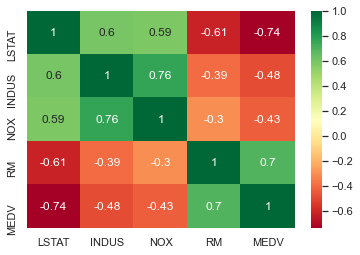

In [191]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
hm = sns.heatmap(boston_df[cols].corr(),
                 cbar=True,
                 annot=True,
                 cmap='RdYlGn')

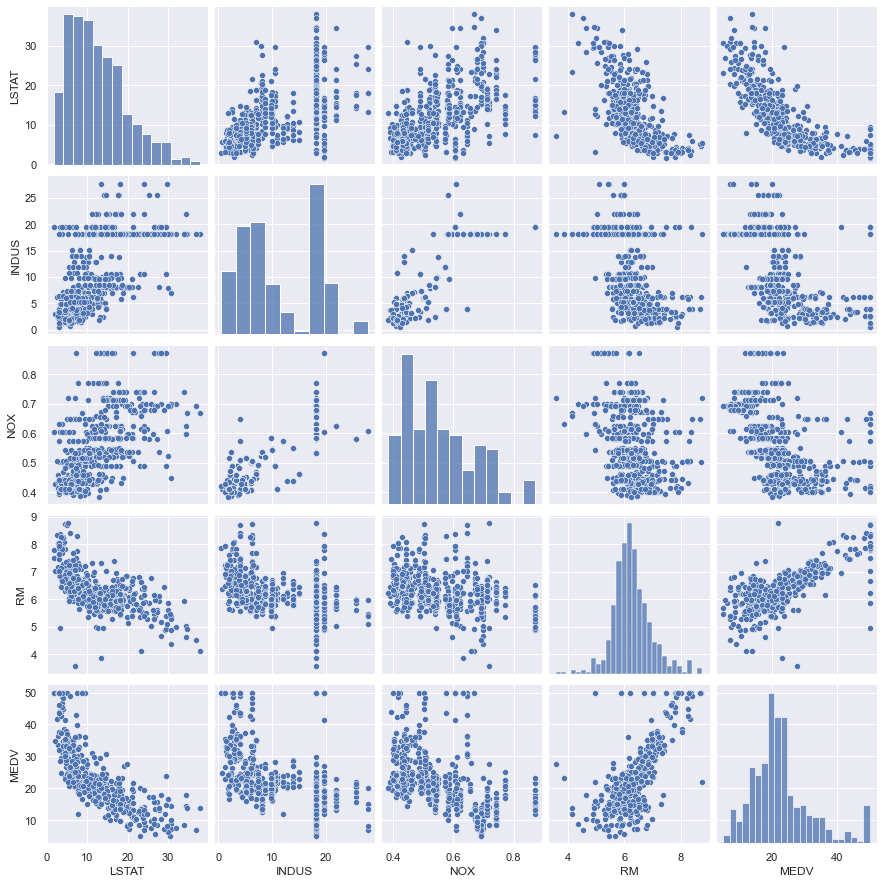

In [192]:
sns.set_theme(palette="deep")
sns.pairplot(boston_df[cols])

1. Для двох (трьох) масивів взаємопов’язаних даних (можна з попередньої роботи)
побудувати діаграму розсіювання, визначити функціональний тип залежності.

In [193]:
X = boston_df[['LSTAT']].values
y = boston_df['MEDV'].values

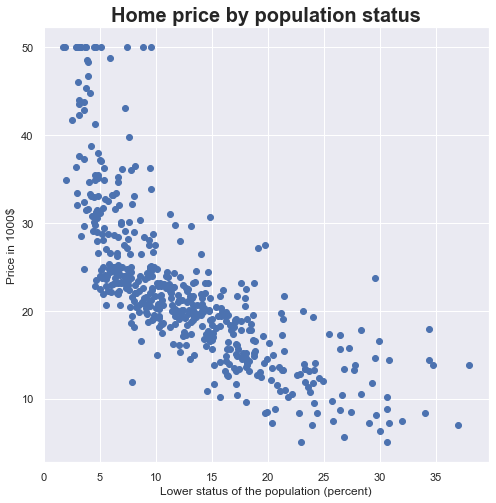

In [201]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y)
plt.xlabel("Lower status of the population (percent)")
plt.ylabel("Price in 1000$")
plt.title("Home price by population status",
         fontdict = {'fontsize': 20,
                     'fontweight': 'bold'})
plt.show()

2. Порахувати параметри регресійної моделі.

In [195]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X, y)
y_pred = linReg.predict(X)
print("Slope: " + str(linReg.coef_[0]))
print("Intercept: " + str(linReg.intercept_))

Slope: -0.9500493537579892
Intercept: 34.55384087938309


In [196]:
R_sq = linReg.score(X, y)
print('Coefficient of determination:', R_sq)

Coefficient of determination: 0.5441462975864797


In [198]:
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 38.48296722989415


In [152]:
residuals = y - y_pred

3. Зобразити отриману лінію регресії разом з діаграмою розсіювання.

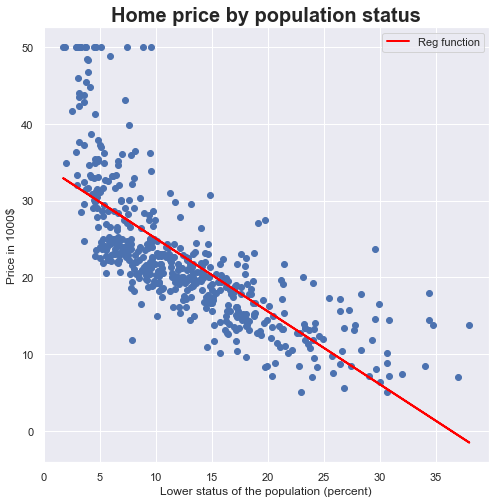

In [202]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X, y)
ax.plot(X, linReg.predict(X), color='red', linewidth=2, label = "Reg funсtion")
ax.set_xlabel("Lower status of the population (percent)")
ax.set_ylabel("Price in 1000$")
plt.title("Home price by population status",
         fontdict = {'fontsize': 20,
                     'fontweight': 'bold'})
plt.legend()
plt.show()

4. Побудувати діаграму «відгук-залишки»

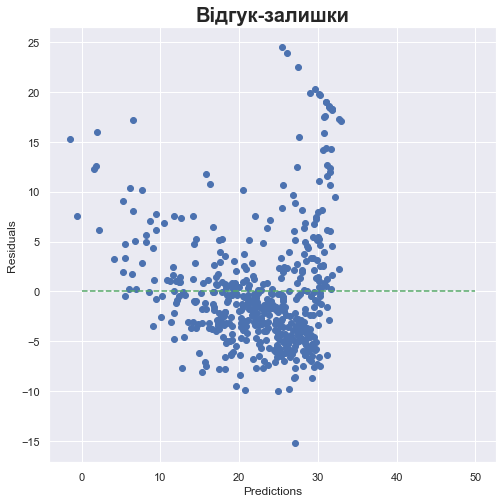

In [204]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_pred, residuals)
ax.plot([0, 50], [0, 0], linestyle="--", color='g')
ax.set_xlabel("Predictions")
ax.set_ylabel("Residuals")
plt.title("Відгук-залишки", 
         fontdict = {'fontsize': 20,
                     'fontweight': 'bold'})
plt.show()

5. Побудувати діаграму «предиктор-залишки»

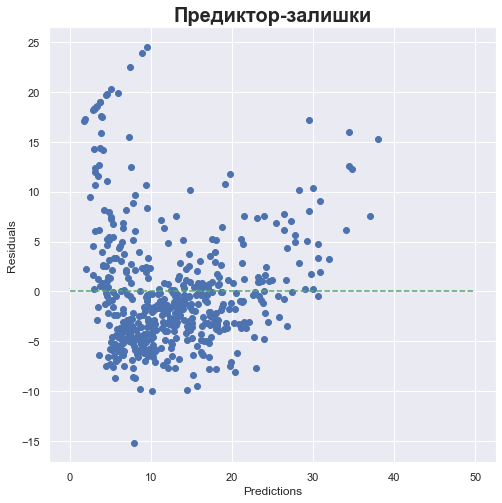

In [205]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, residuals)
ax.plot([0, 50], [0, 0], linestyle="--", color='g')
ax.set_xlabel("Predictions")
ax.set_ylabel("Residuals")
plt.title("Предиктор-залишки", 
         fontdict = {'fontsize': 20,
                     'fontweight': 'bold'})
plt.show()

6. Побудувати Q-Q-діаграму для залишків

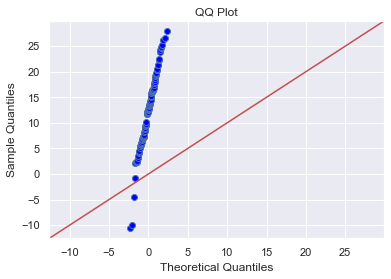

In [206]:
test = np.random.normal(X.mean(), X.std(), 100)
sm.qqplot(test, line='45')
plt.title("QQ Plot")
pylab.show()

7. Якщо виявлено недоліки моделі, покращити її. Перевірити якість виправленої
моделі.

Adding polynomial regression

In [211]:
boston_df['LSTAT2'] = boston_df['LSTAT'] ** 2
X = boston_df[["LSTAT", "LSTAT2"]]

In [212]:
from sklearn.preprocessing import PolynomialFeatures
polReg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
polReg = LinearRegression()
polReg.fit(X_poly, y)
y_pred2 = polReg.predict(X_poly)

In [213]:
print("Коефіцієнт детермінації", polReg.score(X_poly, y))

Коефіцієнт детермінації 0.6730125943871903


In [217]:
mse = mean_squared_error(y, y_pred2)
print("MSE", mse)

MSE 27.604131650489478


In [218]:
residuals2 = y - y_pred2

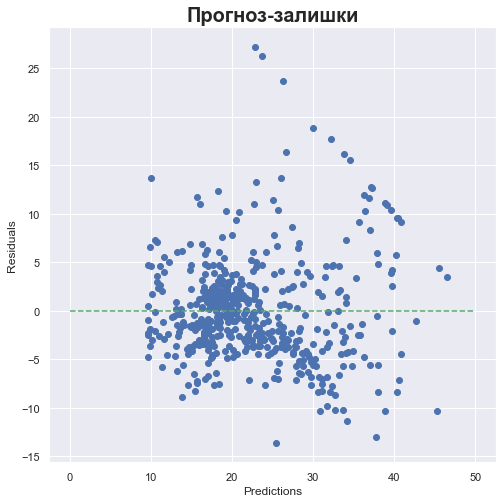

In [220]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_pred2, residuals2)
ax.plot([0, 50], [0, 0], linestyle="--", color='g')
ax.set_xlabel("Predictions")
ax.set_ylabel("Residuals")
plt.title("Прогноз-залишки", 
         fontdict = {'fontsize': 20,
                     'fontweight': 'bold'})
plt.show()

In [231]:
import math
boston_df['LSTAT_LOG'] = np.log(boston_df['LSTAT']) / np.log(0.5)

In [235]:
X = boston_df[['LSTAT', 'LSTAT_LOG']].values
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X, y)
y_pred = linReg.predict(X)
print("Slope: " + str(linReg.coef_))
print("Intercept: " + str(linReg.intercept_))

Slope: [ 0.38043821 11.6095898 ]
Intercept: 57.430624694813574


In [236]:
linReg.score(X,y)

0.674440083863065

In [237]:
mean_squared_error(y, y_pred)

27.483623622518532